In [3]:
#pip install opencv-python
import sys
import os
os.sys.path
import cv2
import numpy as np


from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Tensorflow keras for CNN model
#pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
folder_dir = "flowers"

label=[]
data=[]

SIZE = 128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir,folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir,folder,file))
            img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # converts
            im = cv2.resize(img_rgb,(SIZE,SIZE))
            data.append(im)
        else:
            continue
 


In [5]:
data_array = np.array(data)
label_array = np.array(label)

In [6]:

#print(label_arr)

encoder =LabelEncoder()
y = encoder.fit_transform(label)

#print(y)
y =  to_categorical(y,5) # 5 flower type -converts all 5 into categorical
#print(y)
#x = data_arr/255
#x =[]
#for im in data:
 #   x.append(cv2.normalize(im, None, 0, 255,cv2.NORM_MINMAX, dtype=cv2.CV_32F))
x = data_array/255


In [7]:
print(np.shape(y))
print(np.shape(data))

(4317, 5)
(4317, 128, 128, 3)


In [9]:
#show normalized image
cvShowImage('k',x[0])
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'cvShowImage' is not defined

In [10]:
X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size=0.20, random_state=10)

In [11]:
print(len(X_train))
print(len(Y_train))

3453
3453


In [12]:
model = Sequential()
#input
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#hidden
model.add(Conv2D(filters = 128, kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(Conv2D(filters = 128, kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(Conv2D(filters = 128, kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#output
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [13]:

datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [14]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,Y_test),
                              verbose = 1)

C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\krish\AppData\Local\Temp\ipykernel_26520\154296598.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


Epoch 1/64
108/108 [==============================] - 24s 110ms/step - loss: 1.4737 - accuracy: 0.3420 - val_loss: 1.2807 - val_accuracy: 0.4861
Epoch 2/64
108/108 [==============================] - 10s 91ms/step - loss: 1.3457 - accuracy: 0.4159 - val_loss: 1.2250 - val_accuracy: 0.5035
Epoch 3/64
108/108 [==============================] - 10s 89ms/step - loss: 1.2892 - accuracy: 0.4503 - val_loss: 1.1420 - val_accuracy: 0.5197
Epoch 4/64
108/108 [==============================] - 10s 89ms/step - loss: 1.2275 - accuracy: 0.4642 - val_loss: 1.1072 - val_accuracy: 0.5440
Epoch 5/64
108/108 [==============================] - 9s 87ms/step - loss: 1.1979 - accuracy: 0.5100 - val_loss: 1.2110 - val_accuracy: 0.5023
Epoch 6/64
108/108 [==============================] - 9s 87ms/step - loss: 1.1593 - accuracy: 0.5294 - val_loss: 1.1180 - val_accuracy: 0.5521
Epoch 7/64
108/108 [==============================] - 10s 88ms/step - loss: 1.1158 - accuracy: 0.5450 - val_loss: 1.0395 - val_accuracy: 

Epoch 58/64
108/108 [==============================] - 9s 86ms/step - loss: 0.6457 - accuracy: 0.7674 - val_loss: 0.6622 - val_accuracy: 0.7627
Epoch 59/64
108/108 [==============================] - 9s 86ms/step - loss: 0.6481 - accuracy: 0.7637 - val_loss: 0.6059 - val_accuracy: 0.7766
Epoch 60/64
108/108 [==============================] - 9s 86ms/step - loss: 0.6229 - accuracy: 0.7631 - val_loss: 0.6558 - val_accuracy: 0.7847
Epoch 61/64
108/108 [==============================] - 9s 86ms/step - loss: 0.6386 - accuracy: 0.7660 - val_loss: 0.6322 - val_accuracy: 0.7847
Epoch 62/64
108/108 [==============================] - 9s 86ms/step - loss: 0.6129 - accuracy: 0.7706 - val_loss: 0.6784 - val_accuracy: 0.7639
Epoch 63/64
108/108 [==============================] - 9s 86ms/step - loss: 0.6305 - accuracy: 0.7756 - val_loss: 0.6072 - val_accuracy: 0.7882
Epoch 64/64
108/108 [==============================] - 9s 87ms/step - loss: 0.6281 - accuracy: 0.7677 - val_loss: 0.6842 - val_accuracy:

27/27 [==============================] - 1s 21ms/step


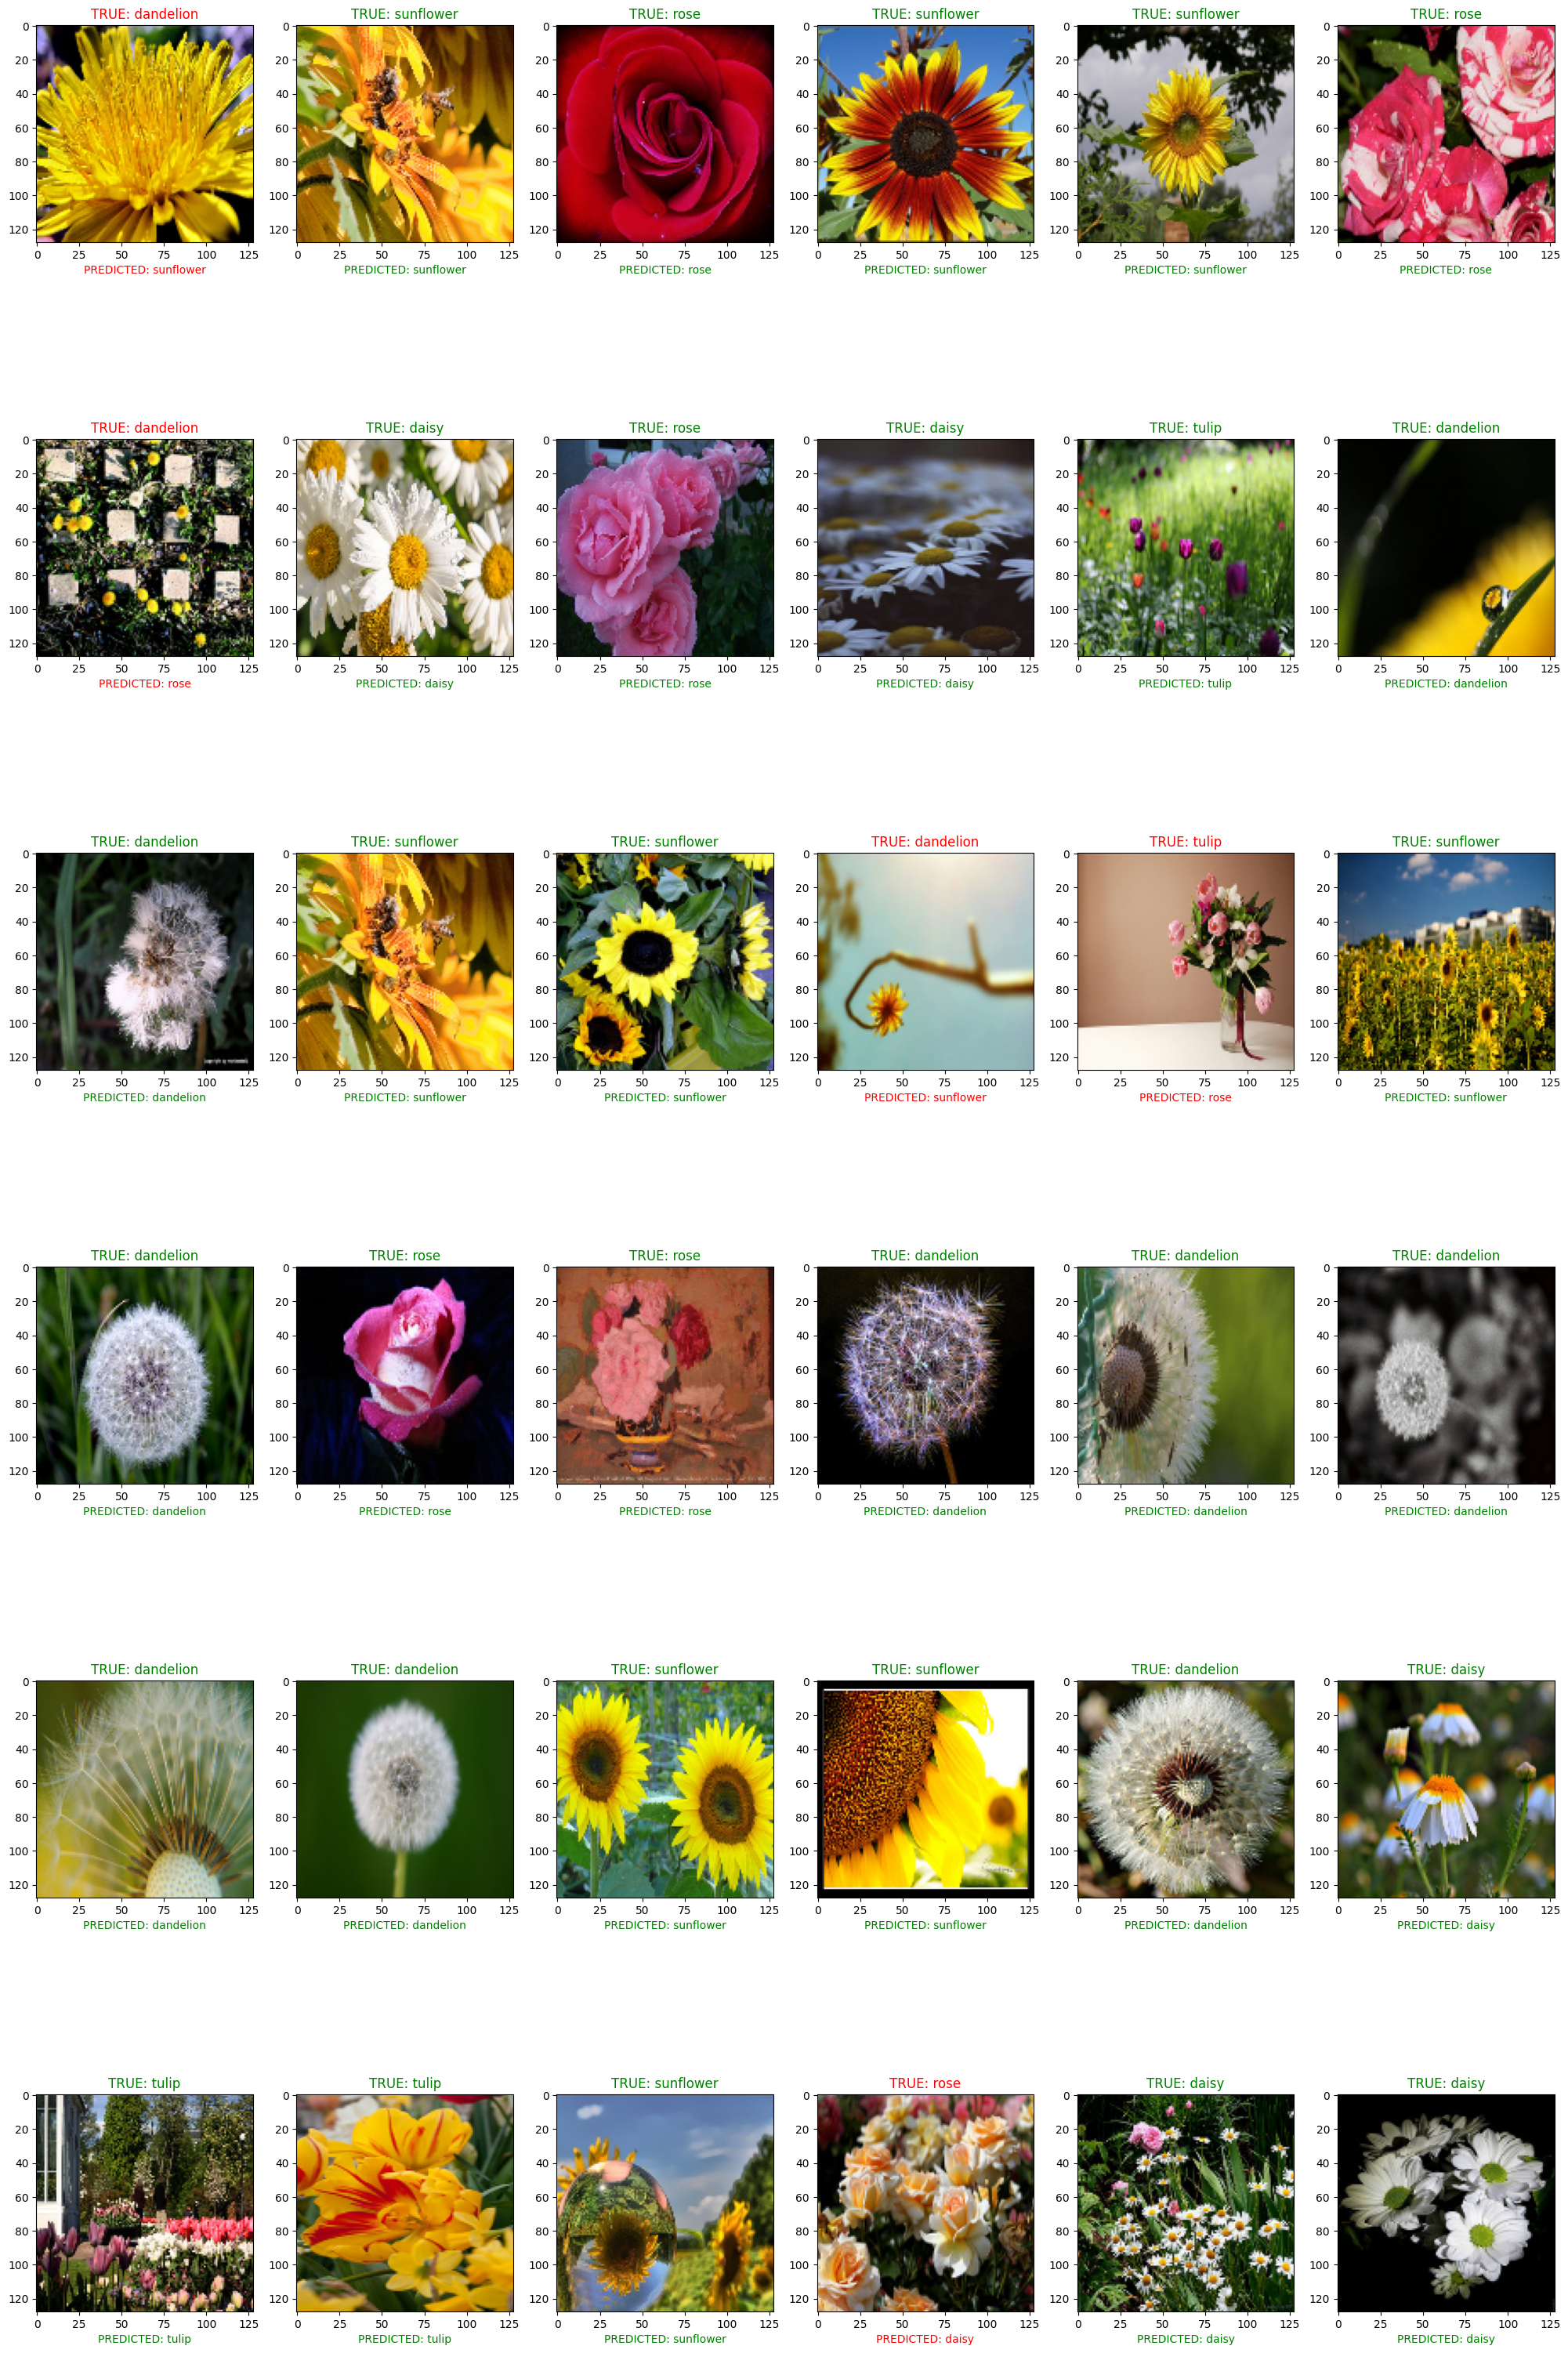

In [15]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(Y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(Y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(Y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [1]:
import tensorflow as tf
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [21]:
path = r'flowers\dandelion\138132145_782763b84f_m.jpg'
test_image = cv2.imread(path)
test_img_rgb = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB) # converts
test_im = cv2.resize(test_img_rgb,(SIZE,SIZE))

In [23]:
a=np.array(test_im)/255

In [24]:
print(categories[np.argmax(model.predict(a))])

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "C:\Users\krish\.conda\envs\machinelearning\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\krish\.conda\envs\machinelearning\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\krish\.conda\envs\machinelearning\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\krish\.conda\envs\machinelearning\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\krish\.conda\envs\machinelearning\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\krish\AppData\Local\Temp\ipykernel_26520\464784862.py", line 1, in <module>
      print(categories[np.argmax(model.predict(a))])
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\krish\.conda\envs\machinelearning\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
input must be 4-dimensional[32,128,3]
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_57343]

In [25]:
ax[i,j].imshow(np.array(a).reshape(SIZE, SIZE, 3), cmap='gray')

TypeError: 'AxesSubplot' object is not subscriptable

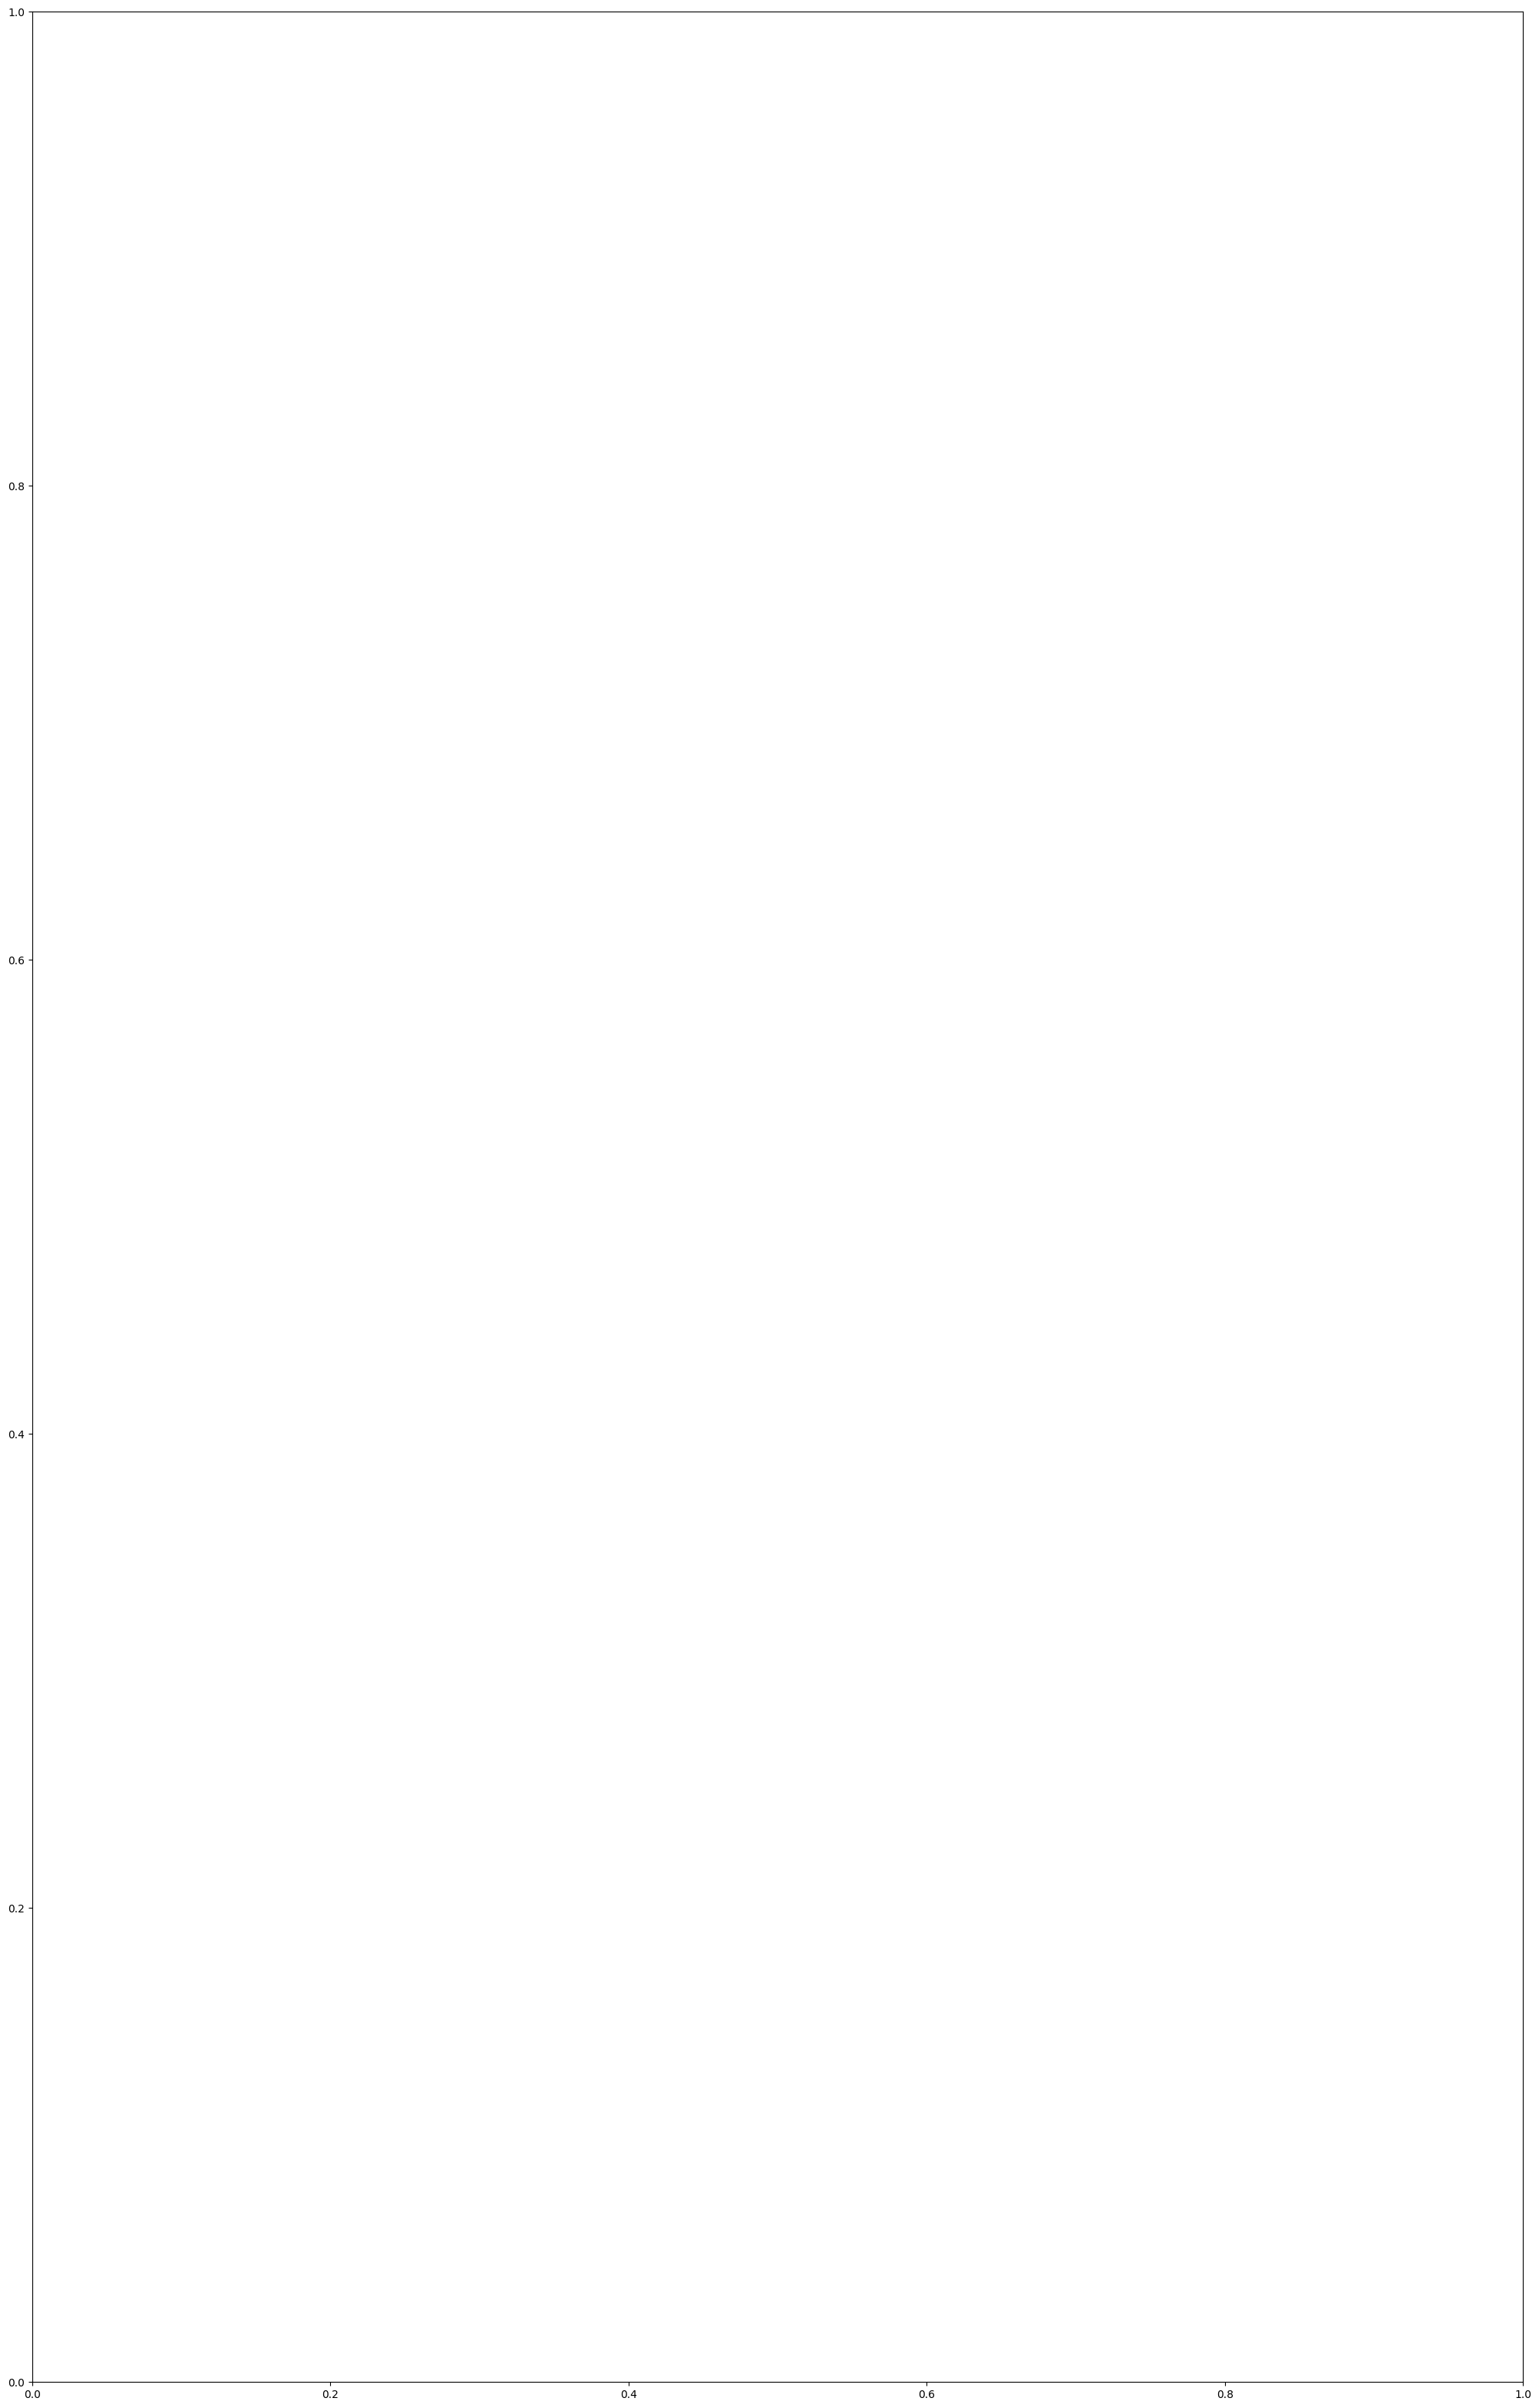

In [30]:
fig, ax = plt.subplots(6,6, figsize=(25, 40))
ax[i,j].imshow(np.array(X_test)[469].reshape(SIZE, SIZE, 3), cmap='gray')

In [27]:
print( int(np.random.random_sample() * len(X_test)))

469
